# Pointilism usage examples

### Explanation
The module `pointillism` contains classes to build pointillized pictures with colors taken from a source image(s). The base class is `pointillize` and can load directories or single images, and includes the primary methods:
* `plotRecPoints()` plots rectangular arrays of circles of fixed radius
* `plotRandomPoints()` plots random circles of random radius
* `plotRandomPointsComplexity()` plots random circles with radius based on complexity of source image in that area

In addition, the subclass `pointillizeStack` contains methods for building a workflow of image manipulations and then saving gif animations of either the construction of the image or of the final result constructed repeatedly to produce a kind of fluid final picture. Currently only implemented to work on single images. Its subclass `pointillizePile` however is implemented to operate in serial on a large list of images and supports saving gifs in batches as well. 

In the future, support will be provided for loading movie files and saving out pointillized versions of them

### Samples
Some images and gifs I've produced can be found here: https://photos.app.goo.gl/SAQ1DMLrkVxoyjGB3

## Import class definitions

In [1]:
from pointillism import pointillize, pointillizeStack, pointillizePile
%run pointillism.py

# Usage examples

## 1) Read image, run routines to pointillize, and save result

In [3]:
# Create instance on directory or filename
point = pointillize(location='images/IMG_0290.jpg', debug = True)

# Crop
point.crop_Y([1000,500], False)

# Display original
#point.display(original=True)

In [4]:
# Plot rectangular grid of overlapping circles to fill canvas
#point.plotRecPoints(n=40, multiplier=1, fill=False)

# Plot many random points with size proportional to area complexity
point.plotRandomPointsComplexity(n=1e5, constant=0.025, power=1, alpha=int(0.1*255))  

plotRandomPointsComplexity: done...took 150.37 sec


In [ ]:
# Display and save
point.display()
point.save_out(location = 'images_out', suffix = 'basic test')

## 2) Build image stacks using `pointillizeStack` and save as gif of intermediate images

In [5]:
# Create instance
point = pointillizeStack(location='images/IMG_0116.jpg', debug = True, border = 0)

# Construct queue
point.new_queue()

# Add to queue
point.add_to_queue(point.crop_Y,[[1000,500], False],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e3,0.01,1.3],10)

# Build image stacks
point.build_stacks(n=1, save_steps=True)

crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done


In [6]:
# Save
point.save_gif('gifs/animated_stacking.gif', step_duration=0.5)

In [7]:
# Display
from IPython.display import HTML
HTML('<img src="gifs/animated_stacking.gif">')

## 3) Build image stacks using `pointillizeStack` and save as gif of final images

In [8]:
# Construct queue
point.new_queue()

# Add to queue
point.add_to_queue(point.crop_Y,[[1000,500], False],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e4,0.01,1.3],1)

# Build image stacks
point.build_stacks(n=10, save_steps=False)

Building image:  1 2 3 4 5 6 7 8 9 10 done


In [9]:
# Save
point.save_gif('gifs/animated_stacking_loop.gif', step_duration=0.1)

In [10]:
# Display
HTML('<img src="gifs/animated_stacking_loop.gif">')

## 4) Build image stacks using `pointillizeStack` and save as gif of multiplied images

In [11]:
point = pointillizeStack(location='images/IMG_0116.jpg', border = 0, debug=True, queue=True)
point.crop_Y([1000,500], resize=False)

In [12]:
point.plotRecPoints(n=40, multiplier=1, fill=False)
point.plotRandomPointsComplexity(n=5e4, constant=0.01, power=1.3)

plotRecPoints: done...took 0.77 sec
plotRandomPointsComplexity: done...took 51.63 sec


In [13]:
multipliers = [5,4.5,4,3.5,3,2.6,2.3,2,1.75,1.5,1.25,1.1,1,1,1,1,1]
point.build_multipliers(multipliers)

Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done


In [14]:
point.save_gif('gifs/pointqueue.gif',0.1)

In [15]:
HTML('<img src="gifs/pointqueue.gif">')

## 5. Bulk image processing with `pointillizePile`

In [16]:
# Create instance on directory
point = pointillizePile(location='images/', debug = True, border = 0)

### Images

In [17]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,[[960,540], False],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e4,0.01,1.3],1)

# Run and save
point.run_pile_images(location = 'images_out', suffix = 'no border')

Batch processing image: 1 2 3 4 done


### Loop GIFs

In [18]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,[[1000,500], False],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e4,0.01,1.3],1)

# Run and save (gifs) in loop mode
point.run_pile_gifs(location = 'images_out/gifs', n=10, save_steps = False, step_duration = 0.1, suffix = 'loop')

1 Building image:  1 2 3 4 5 6 7 8 9 10 done
2 Building image:  1 2 3 4 5 6 7 8 9 10 done
3 Building image:  1 2 3 4 5 6 7 8 9 10 done
4 Building image:  1 2 3 4 5 6 7 8 9 10 done


### Assembly gifs

In [19]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,[[1000,500], False],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e3,0.01,1.3],10)

# Run and save (gifs) in assembly mode
point.run_pile_gifs(location = 'images_out/gifs', n=1, save_steps = True, step_duration = 0.5, suffix = 'assembly')

1 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done
2 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done
3 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done
4 crop_Y: 1 done
plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done


### Multiplier gifs

In [20]:
# Create instance on directory
point = pointillizePile(location='images/', debug=True, border=0, queue=True)

In [21]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop_Y,[[1000,500], False],1)
point.add_to_queue(point.plotRecPoints,[40, 1, True],1)
point.add_to_queue(point.plotRandomPointsComplexity,[2e4,0.01,1.3],1)

# Run and save (gifs) in multiplier mode
multipliers = [5,4.5,4,3.5,3,2.6,2.3,2,1.75,1.5,1.25,1.1,1,1,1,1,1]
point.run_pile_multipliers(location = 'images_out/gifs', multipliers = multipliers,
                           step_duration = 0.1, suffix = 'muliplier')

1 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done
2 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done
3 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done
4 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 done


# WORKING

## Adding sampling bias image

In [217]:
from pointillism import pointillize, pointillizeStack, pointillizePile
%run pointillism.py

In [218]:
# Create instance on directory or filename
point = pointillize(location='images/IMG_0290.jpg', debug = True)

# Crop
point.crop_Y([1000,500], False)

# Display original
#point.display(original=True)

In [219]:
then = time.time()
point._makeProbabilityMask(0.01, 2)
print('took %0.2f seconds' %(time.time() - then))

took 1.72 seconds


In [220]:
mask = Image.fromarray(point.probabilityMask)

In [221]:
mask.save('probability.tiff')

## Implementing

In [222]:
# Plot rectangular grid of overlapping circles to fill canvas
#point.plotRecPoints(n=40, multiplier=1, fill=False)

# Plot many random points with size proportional to area complexity
point.plotRandomPointsComplexity(n=1e4, constant=0.015, power=1, alpha=int(0.1*255))  

plotRandomPointsComplexity: done...took 59.13 sec


images/IMG_0290.jpg


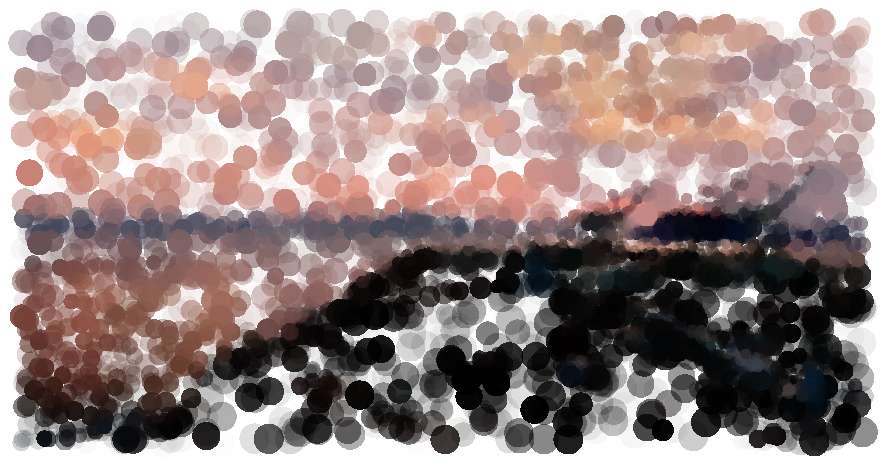

In [223]:
# Display and save
point.display()
point.save_out(location = 'images_out', suffix = 'basic test')

# Documentation

In [5]:
# Help on module
import pointillism
help(pointillism)

Help on module pointillism:

NAME
    pointillism - This module contains classes that help create pointillized images.

CLASSES
    builtins.object
        pointillize
            pointillizeStack
                pointillizePile
    
    class pointillize(builtins.object)
     |  Base class for pointillzation project
     |  
     |  Methods defined here:
     |  
     |  __init__(self, *args, **kwargs)
     |      Initiialize with image or directory
     |  
     |  crop_Y(self, aspect, resize)
     |      Crops and resizes in the height dimension to match aspect ratio
     |  
     |  display(self, **kwargs)
     |      Displays browser-size version of outputs, or original images
     |      if original=True
     |  
     |  plotRandomPointsComplexity(self, n, constant, power)
     |      plots random points over image, where constant is
     |      the portion of the width for the max size of the bubble,
     |      and power pushes the distribution towards smaller bubbles
     |  
